In [1]:
!python --version

Python 3.13.1


In [2]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement mediapipe (from versions: none)
ERROR: No matching distribution found for mediapipe


In [3]:
import tensorflow as tf
import cv2
import mediapipe as mp
import sklearn
import matplotlib.pyplot as plt
import os 
import numpy as np
import time


print("TensorFlow:", tf.__version__)
print("OpenCV:", cv2.__version__)
print("MediaPipe:", mp.__version__)
print("Scikit-learn:", sklearn.__version__)


TensorFlow: 2.19.1
OpenCV: 4.11.0
MediaPipe: 0.10.21
Scikit-learn: 1.7.1


In [4]:
mp_holistic= mp.solutions.holistic #holistic model
mp_drawing= mp.solutions.drawing_utils #drawing utilities

In [5]:
def mediapipe_detection(image, model):
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True   # Image is writeable again
    # Convert RGB back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results


In [6]:
def draw_landmarks(image, results):
    # Face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_holistic.FACEMESH_TESSELATION
        )
    
    # Pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS
        )
    
    # Left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )
    
    # Right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )


In [7]:
def draw_styled_landmarks(image, results):
    # Face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),  # landmarks
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)   # connections
        )
    
    # Pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),   # landmarks
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)   # connections
        )
    
    # Left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    
    # Right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:
cap =cv2.VideoCapture(0)
#set mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #read feed
        ret,frame=cap.read()
    
        #make detections
        image, results= mediapipe_detection(frame, holistic)
        print(results)

        #draw landmarks
        draw_styled_landmarks(image,results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.pose_landmarks.landmark)

33

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame,results)

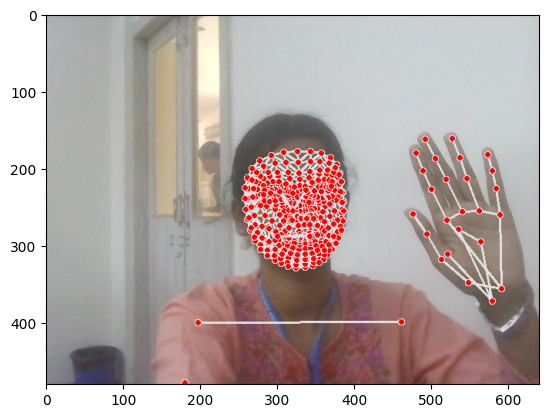

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [14]:
len(results.pose_landmarks.landmark)*3

99

In [15]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] 
                 for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

face = np.array([[res.x, res.y, res.z] 
                 for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

lh = np.array([[res.x, res.y, res.z] 
               for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

rh = np.array([[res.x, res.y, res.z] 
               for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

keypoints = np.concatenate([pose, face, lh, rh])


In [17]:
face

array([ 0.52552575,  0.58894396, -0.02744734, ...,  0.57939649,
        0.46615669,  0.02383547])

In [18]:
def extract_keypoints(results):
    # Pose: 33 landmarks, each with x,y,z,visibility → 33*4 = 132
    pose = np.array([[res.x, res.y, res.z, res.visibility] 
                     for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Face: 468 landmarks, each with x,y,z → 468*3 = 1404
    face = np.array([[res.x, res.y, res.z] 
                     for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Left hand: 21 landmarks, each with x,y,z → 21*3 = 63
    lh = np.array([[res.x, res.y, res.z] 
                   for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Right hand: 21 landmarks, each with x,y,z → 21*3 = 63
    rh = np.array([[res.x, res.y, res.z] 
                   for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    # Combine everything into one array → total length should be 1662
    return np.concatenate([pose, face, lh, rh])


In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.50078416,  0.53205025, -0.75833195, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
468*3+33*4+21*3+21*3

1662

In [22]:
np.save('0',result_test)

In [23]:
np.load('0.npy')

array([ 0.50078416,  0.53205025, -0.75833195, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
#make changes here 
#path for exported data,numpy arrays
DATA_PATH=os.path.join('MP_data')

#update this shit
#ACtions that we try to detect
actions=np.array(['help','blood','pain','bone_break','fever'])

#thirty videos worth of data
no_sequences=50

#videos are going to be 30 frames in lenght
sequence_length=30

In [25]:
#help
##0
##1
##2
##...
##29

#blood

#pain


In [26]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [102]:
cap =cv2.VideoCapture(0)
#set mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #new loop
    #loop through actions
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video lenght aka sequence lenght
            for frame_num in range(sequence_length):
    
    
                #read feed
                ret,frame=cap.read()
            
                #make detections
                image, results= mediapipe_detection(frame, holistic)
                print(results)
        
                #draw landmarks
                draw_styled_landmarks(image,results)
    
                #new apply collection logic
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECCTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1 ,(0,255,0), 4,cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 1,cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                #new Export Keypoints
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
                np.save(npy_path,keypoints)

    
                #break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [27]:
# cap.release()
# cv2.destroyAllWindows() 

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map={label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'help': 0, 'blood': 1, 'pain': 2, 'bone_break': 3, 'fever': 4}

In [31]:

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
X = np.array(sequences)
y = np.array(labels)
print(X,y)

[[[ 0.45699447  0.22805548 -0.80760467 ...  0.          0.
    0.        ]
  [ 0.45884943  0.26506537 -0.90000886 ...  0.47137615  0.74152994
   -0.01722418]
  [ 0.46057358  0.28010568 -0.98343992 ...  0.46892157  0.75083411
   -0.01562603]
  ...
  [ 0.46346411  0.3059684  -1.04865992 ...  0.44921163  0.80444306
   -0.02469386]
  [ 0.46386567  0.305949   -1.03973389 ...  0.45199564  0.80712253
   -0.0261462 ]
  [ 0.46393332  0.30578414 -0.97554874 ...  0.45826834  0.80458808
   -0.0224866 ]]

 [[ 0.46398678  0.30575654 -0.94927931 ...  0.45939067  0.81278312
   -0.02315349]
  [ 0.47248322  0.30010077 -0.51742315 ...  0.          0.
    0.        ]
  [ 0.47589764  0.29878837 -0.56889713 ...  0.72739983  0.5652613
   -0.03221431]
  ...
  [ 0.47511512  0.29845974 -0.64267838 ...  0.72144359  0.57471907
   -0.05965911]
  [ 0.47510481  0.2982299  -0.64258301 ...  0.62950546  0.5646255
   -0.05133449]
  [ 0.47510538  0.29795656 -0.61679244 ...  0.70218801  0.60667682
   -0.01837386]]

 [[ 0.

In [33]:
import numpy as np

def augment_sequence(sequence, noise_factor=0.05, scale_factor=0.1, shift_factor=0.1):
    """
    Apply augmentation to a single sequence (30 frames of keypoints).
    sequence: shape (30, keypoints_dim)
    """
    augmented = sequence.copy()

    # 1. Add random noise
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=augmented.shape)
    augmented += noise

    # 2. Random scaling
    scale = np.random.uniform(1 - scale_factor, 1 + scale_factor)
    augmented *= scale

    # 3. Random shifting
    shift = np.random.uniform(-shift_factor, shift_factor, size=(1, augmented.shape[1]))
    augmented += shift

    return augmented

# Ensure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

augmented_sequences = []
augmented_labels = []

for seq, label in zip(X, y):
    # Original sequence
    augmented_sequences.append(seq)
    augmented_labels.append(label)

    # Augmented versions (2 per original sequence)
    for _ in range(2):
        aug_seq = augment_sequence(seq)
        augmented_sequences.append(aug_seq)
        augmented_labels.append(label)

# Convert back to arrays
X_aug = np.array(augmented_sequences, dtype=np.float32)
y_aug = np.array(augmented_labels)

print("Original dataset:", X.shape, y.shape)
print("Augmented dataset:", X_aug.shape, y_aug.shape)


Original dataset: (250, 30, 1662) (250,)
Augmented dataset: (750, 30, 1662) (750,)


In [34]:
np.array(sequences).shape

(250, 30, 1662)

In [35]:
np.array(labels).shape

(250,)

In [36]:
x=np.array(sequences)

In [37]:
x.shape

(250, 30, 1662)

In [38]:
y=to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, shuffle=True, random_state=42
)


In [41]:
y_train.shape


(175, 5)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir =os.path.join('logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [44]:
# model =Sequential()
# model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(128,return_sequences=True, activation='relu'))
# model.add(LSTM(64,return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation="softmax"))

In [45]:
actions = np.array(['help','blood','pain','bone_break','fever'])


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


C:\signlanguageproject\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
res =[.7,0.2,0.3]

In [48]:
actions[np.argmax(res)]

'help'

In [49]:
model.compile(optimizer='Adam',loss="categorical_crossentropy", metrics=['categorical_accuracy'])


In [50]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("Eager:", tf.executing_eagerly())


TF version: 2.19.1
Eager: True


In [51]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Unique y values:", np.unique(y_train))


X_train shape: (175, 30, 1662)
y_train shape: (175, 5)
Unique y values: [0 1]


In [136]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - categorical_accuracy: 0.6686 - loss: 0.6541
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - categorical_accuracy: 0.6686 - loss: 0.6466
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - categorical_accuracy: 0.6800 - loss: 0.6286
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - categorical_accuracy: 0.6629 - loss: 0.6397
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - categorical_accuracy: 0.7029 - loss: 0.6782
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - categorical_accuracy: 0.6800 - loss: 0.7542
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - categorical_accuracy: 0.6629 - loss: 0.6306
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - categorical_accuracy: 0.7143 - loss: 0.6335
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - categorical_accuracy: 0.7371 - loss: 0.6042
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - categorical_accuracy: 0.7429 - loss: 0.5626
Epoch 11/200
6/6 ━━━━━━━━━━━━

KeyboardInterrupt: 

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 128)             │         916,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,114,887 (4.25 MB)

 Trainable params: 1,114,885 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [54]:
res = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


In [55]:
actions[np.argmax(res[1])]

'help'

In [56]:
actions[np.argmax(y_test[1])]

'help'

In [141]:
model.save('action.h5')


In [71]:
del model #to reload, delete and then run model= sequential() then complile it then run model.load

In [50]:
model.load_weights('action.h5')

In [52]:
from tensorflow.keras.models import load_model
model = load_model("action.h5")  # load saved model

# Now run your detection + gTTS code here


In [57]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [58]:
yhat=model.predict(X_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


In [59]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [60]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[120,  18],
        [  3,  34]],

       [[134,   2],
        [  5,  34]],

       [[142,   0],
        [  0,  33]],

       [[141,   1],
        [ 13,  20]],

       [[142,   0],
        [  0,  33]]], dtype=int64)

In [61]:
accuracy_score(ytrue,yhat)

0.88

#11. test in real time

In [62]:
!pip install gTTS


Defaulting to user installation because normal site-packages is not writeable


In [63]:
import sys
print(sys.executable)


C:\signlanguageproject\tf_env\Scripts\python.exe


In [64]:
import sys
!{sys.executable} -m pip install gTTS


In [65]:
!pip install playsound==1.2.2


Defaulting to user installation because normal site-packages is not writeable


In [66]:
# from gtts import gTTS
# from playsound import playsound
# import os, uuid, threading, time
# import cv2, numpy as np, mediapipe as mp

# # ---------- Hindi TTS without blocking UI ----------
# _speaking = False
# def speak_text_hi(text):
#     """Generate + play Hindi TTS in a background thread."""
#     global _speaking
#     if _speaking:
#         return
#     def run():
#         global _speaking
#         _speaking = True
#         fname = f"tts_{uuid.uuid4().hex}.mp3"
#         try:
#             gTTS(text=text, lang='hi').save(fname)
#             playsound(fname)
#         except Exception as e:
#             print("TTS error:", e)
#         finally:
#             try:
#                 os.remove(fname)
#             except:
#                 pass
#             _speaking = False
#     threading.Thread(target=run, daemon=True).start()


# # ---------- Your action labels ----------
# actions = np.array([
#     'pain',
#     'stomach_pain',
#     'chest_pain',
#     'blood',
#     'injury',
#     'help',
#     'fever'
# ])

# # ---------- Map each label to Hindi sentence ----------
# spoken_map = {
#     'pain'         : 'मुझे दर्द हो रहा है!',
#     'stomach_pain' : 'मुझे पेट में दर्द हो रहा है!',
#     'chest_pain'   : 'मुझे सीने में दर्द हो रहा है!',
#     'blood'        : 'मुझे खून निकल रहा है!',
#     'injury'       : 'मुझे चोट लगी है!',
#     'help'         : 'कृपया मेरी मदद करें!',
#     'fever'        : 'मुझे बुखार है!'
# }

# # ---------- Inference settings ----------
# sequence = []         # last 30 frames of keypoints
# sentence = []         # confirmed words to show
# predictions = []      # rolling predictions for stability

# threshold = 0.6           # confidence threshold
# STABILITY_FRAMES = 10     # number of frames to check for stability
# COOLDOWN_SECS = 3         # minimum seconds before repeating same word

# last_spoken_time = {}

# # ---------- Setup video + mediapipe ----------
# cap = cv2.VideoCapture(0)
# with mp.solutions.holistic.Holistic(
#         min_detection_confidence=0.5,
#         min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # 1) Detect keypoints
#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         # 2) Collect 30-frame sequence
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]

#         # 3) Predict when we have 30 frames
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
#             pred_idx = int(np.argmax(res))
#             conf = float(res[pred_idx])
#             predictions.append(pred_idx)

#             # keep only last STABILITY_FRAMES predictions
#             if len(predictions) > STABILITY_FRAMES:
#                 predictions = predictions[-STABILITY_FRAMES:]

#             # Debug overlay: prediction + confidence
#             cv2.putText(image, f"{actions[pred_idx]}  {conf:.2f}", (10, 70),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)

#             # --- Confidence bar visualization ---
#             bar_w = int(conf * 200)
#             cv2.rectangle(image, (10, 90), (10+bar_w, 120), (0,255,0), -1)
#             cv2.rectangle(image, (10, 90), (210, 120), (255,255,255), 2)

#             # 4) Majority vote + stability gate
#             if conf > threshold:
#                 most_common = max(set(predictions), key=predictions.count)
#                 freq = predictions.count(most_common)

#                 if freq >= int(0.7 * STABILITY_FRAMES):  # 70% agreement
#                     word = actions[most_common]
#                     now = time.time()

#                     # check cooldown before speaking
#                     if word not in last_spoken_time or (now - last_spoken_time[word]) > COOLDOWN_SECS:
#                         sentence.append(word)
#                         speak_text_hi(spoken_map.get(word, word))
#                         last_spoken_time[word] = now

#         # Keep only last 5 spoken labels
#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         # Show bar with recognised words
#         cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
#         cv2.putText(image, ' '.join(sentence), (8,30),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

#         cv2.imshow('ISL Emergency Feed', image)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()


In [151]:
# #nice
# from gtts import gTTS
# from playsound import playsound
# import os, uuid, threading, time
# import cv2, numpy as np, mediapipe as mp

# # ---------- Hindi TTS without blocking UI ----------
# _speaking = False
# def speak_text_hi(text):
#     """Generate + play Hindi TTS in a background thread."""
#     global _speaking
#     if _speaking:
#         return
#     def run():
#         global _speaking
#         _speaking = True
#         fname = f"tts_{uuid.uuid4().hex}.mp3"
#         try:
#             gTTS(text=text, lang='hi').save(fname)
#             playsound(fname)
#         except Exception as e:
#             print("TTS error:", e)
#         finally:
#             try:
#                 os.remove(fname)
#             except:
#                 pass
#             _speaking = False
#     threading.Thread(target=run, daemon=True).start()

# # ---------- Your action labels ----------
# actions = np.array([
#     'help',
#     'blood',
#     'pain',
#     'bone_break',
#     'fever'
# ])

# # ---------- Map each label to Hindi sentence ----------
# spoken_map = {
#     'help'       : 'कृपया मेरी मदद करें!',
#     'blood'      : 'मुझे खून निकल रहा है!',
#     'pain'       : 'मुझे दर्द हो रहा है!',
#     'bone_break' : 'मेरी हड्डी टूट गई है!',
#     'fever'      : 'मुझे बुखार है!'
# }

# # ---------- Inference settings ----------
# sequence = []         # last 30 frames of keypoints
# sentence = []         # confirmed words to show
# predictions = []      # rolling predictions for stability

# threshold = 0.7           # confidence threshold
# STABILITY_FRAMES = 10     # number of frames to check for stability
# COOLDOWN_SECS = 3         # minimum seconds before repeating same word

# last_spoken_time = {}

# # ---------- Setup video + mediapipe ----------
# cap = cv2.VideoCapture(0)
# with mp.solutions.holistic.Holistic(
#         min_detection_confidence=0.5,
#         min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # 1) Detect keypoints
#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         # 2) Collect 30-frame sequence
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]

#         # 3) Predict when we have 30 frames
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
#             pred_idx = int(np.argmax(res))
#             conf = float(res[pred_idx])
#             predictions.append(pred_idx)

#             # keep only last STABILITY_FRAMES predictions
#             if len(predictions) > STABILITY_FRAMES:
#                 predictions = predictions[-STABILITY_FRAMES:]

#             # Debug overlay: prediction + confidence
#             cv2.putText(image, f"{actions[pred_idx]}  {conf:.2f}", (10, 70),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)

#             # --- Confidence bar visualization ---
#             bar_w = int(conf * 200)
#             cv2.rectangle(image, (10, 90), (10+bar_w, 120), (0,255,0), -1)
#             cv2.rectangle(image, (10, 90), (210, 120), (255,255,255), 2)

#             # 4) Majority vote + stability gate
#             if conf > threshold:
#                 most_common = max(set(predictions), key=predictions.count)
#                 freq = predictions.count(most_common)

#                 if freq >= int(0.7 * STABILITY_FRAMES):  # 70% agreement
#                     word = actions[most_common]
#                     now = time.time()

#                     # check cooldown before speaking
#                     if word not in last_spoken_time or (now - last_spoken_time[word]) > COOLDOWN_SECS:
#                         sentence.append(word)
#                         speak_text_hi(spoken_map.get(word, word))
#                         last_spoken_time[word] = now

#         # Keep only last 5 spoken labels
#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         # Show bar with recognised words
#         cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
#         cv2.putText(image, ' '.join(sentence), (8,30),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

#         cv2.imshow('ISL Emergency Feed', image)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()


In [67]:
#final 
from gtts import gTTS
from playsound import playsound
import os, uuid, threading, time
import cv2, numpy as np, mediapipe as mp

# ---------- Hindi TTS without blocking UI ----------
_speaking = False
def speak_text_hi(text):
    """Generate + play Hindi TTS in a background thread."""
    global _speaking
    if _speaking:
        return
    def run():
        global _speaking
        _speaking = True
        fname = f"tts_{uuid.uuid4().hex}.mp3"
        try:
            gTTS(text=text, lang='hi').save(fname)
            playsound(fname)
        except Exception as e:
            print("TTS error:", e)
        finally:
            try:
                os.remove(fname)
            except:
                pass
            _speaking = False
    threading.Thread(target=run, daemon=True).start()


# ---------- Your action labels ----------
actions = np.array([
    'help',
    'blood',
    'pain',
    'bone_break',
    'fever'
])

# ---------- Map each label to Hindi sentence ----------
spoken_map = {
    'help'       : 'कृपया मेरी मदद करें!',
    'blood'      : 'मुझे खून निकल रहा है!',
    'pain'       : 'मुझे दर्द हो रहा है!',
    'bone_break' : 'मेरी हड्डी टूट गई है!',
    'fever'      : 'मुझे बुखार है!'
}


# ---------- Inference settings ----------
sequence = []         # last 30 frames of keypoints
sentence = []         # confirmed words to show
predictions = []      # rolling predictions for stability

threshold = 0.5           # confidence threshold
STABILITY_FRAMES = 10     # number of frames to check for stability
COOLDOWN_SECS = 3         # minimum seconds before repeating same word

last_spoken_time = {}


# ---------- Setup video + mediapipe ----------
cap = cv2.VideoCapture(0)
with mp.solutions.holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # 1) Detect keypoints
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # 2) Collect 30-frame sequence
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        # ----- NEW: Check if any hands are detected -----
        hands_visible = results.left_hand_landmarks or results.right_hand_landmarks

        # 3) Predict only if we have 30 frames AND hands visible
        if len(sequence) == 30 and hands_visible:
            res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
            pred_idx = int(np.argmax(res))
            conf = float(res[pred_idx])
            predictions.append(pred_idx)

            # keep only last STABILITY_FRAMES predictions
            if len(predictions) > STABILITY_FRAMES:
                predictions = predictions[-STABILITY_FRAMES:]

            # --- Debug overlay: prediction + confidence ---
            cv2.putText(image, f"{actions[pred_idx]}  {conf:.2f}", (10, 70),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)

            # --- Confidence bar visualization ---
            bar_w = int(conf * 200)
            cv2.rectangle(image, (10, 90), (10+bar_w, 120), (0,255,0), -1)
            cv2.rectangle(image, (10, 90), (210, 120), (255,255,255), 2)

            # 4) Majority vote + stability gate
            if conf > threshold:
                most_common = max(set(predictions), key=predictions.count)
                freq = predictions.count(most_common)

                if freq >= int(0.7 * STABILITY_FRAMES):  # 70% agreement
                    word = actions[most_common]
                    now = time.time()

                    # check cooldown before speaking
                    if word not in last_spoken_time or (now - last_spoken_time[word]) > COOLDOWN_SECS:
                        sentence.append(word)
                        speak_text_hi(spoken_map.get(word, word))
                        last_spoken_time[word] = now

        else:
            # ----- NEW: No sign detected -----
            cv2.putText(image, "No sign detected", (10, 70),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
            predictions = []  # reset rolling predictions to avoid carryover

        # Keep only last 5 spoken labels
        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Show bar with recognised words
        cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (8,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        cv2.imshow('ISL Emergency Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [157]:
# # ---------- Action labels ----------
# actions = np.array([
#     'none',        # index 0: no sign
#     'help',
#     'blood',
#     'pain',
#     'bone_break',
#     'fever'
# ])

# spoken_map = {
#     'help'       : 'कृपया मेरी मदद करें!',
#     'blood'      : 'मुझे खून निकल रहा है!',
#     'pain'       : 'मुझे दर्द हो रहा है!',
#     'bone_break' : 'मेरी हड्डी टूट गई है!',
#     'fever'      : 'मुझे बुखार है!'
#     # no speech for 'none'
# }

# # ---------- Inference ----------
# cap = cv2.VideoCapture(0)
# sequence = []
# predictions = []
# sentence = []

# threshold = 0.7
# STABILITY_FRAMES = 10
# COOLDOWN_SECS = 3
# last_spoken_time = {}

# with mp.solutions.holistic.Holistic(
#         min_detection_confidence=0.5,
#         min_tracking_confidence=0.5) as holistic:

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Mediapipe detection
#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         # Extract keypoints
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]

#         # Check if any hands are visible
#         hands_visible = results.left_hand_landmarks or results.right_hand_landmarks

#         if len(sequence) == 30:
#             if hands_visible:
#                 # Predict normally
#                 res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
#                 pred_idx = int(np.argmax(res))
#                 conf = float(res[pred_idx])
#             else:
#                 # Force 'none' prediction
#                 pred_idx = 0
#                 conf = 1.0

#             predictions.append(pred_idx)
#             if len(predictions) > STABILITY_FRAMES:
#                 predictions = predictions[-STABILITY_FRAMES:]

#             # Majority vote + stability
#             most_common = max(set(predictions), key=predictions.count)
#             freq = predictions.count(most_common)

#             if freq >= int(0.7 * STABILITY_FRAMES) and actions[most_common] != 'none':
#                 word = actions[most_common]
#                 now = time.time()
#                 if word not in last_spoken_time or (now - last_spoken_time[word]) > COOLDOWN_SECS:
#                     sentence.append(word)
#                     speak_text_hi(spoken_map.get(word, word))
#                     last_spoken_time[word] = now

#         # Show only last 5 words
#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         # Draw text overlay
#         cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
#         cv2.putText(image, ' '.join(sentence), (8,30),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

#         cv2.imshow('ISL Emergency Feed', image)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()


In [148]:
# #nice 
# actions = np.array(['none','help','blood','pain','bone_break','fever'])

# spoken_map = {
#     'help'       : 'कृपया मेरी मदद करें!',
#     'blood'      : 'मुझे खून निकल रहा है!',
#     'pain'       : 'मुझे दर्द हो रहा है!',
#     'bone_break' : 'मेरी हड्डी टूट गई है!',
#     'fever'      : 'मुझे बुखार है!'
# }

# sequence, sentence, predictions = [], [], []

# threshold = 0.7            # raise threshold for better reliability
# STABILITY_FRAMES = 12      # need more agreement for stability
# COOLDOWN_SECS = 3          # cooldown before repeating same word
# last_spoken_time = {}
# last_word = None            # track last spoken word

# cap = cv2.VideoCapture(0)

# with mp.solutions.holistic.Holistic(
#         min_detection_confidence=0.6,
#         min_tracking_confidence=0.6) as holistic:

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         # Check hands
#         hands_visible = results.left_hand_landmarks or results.right_hand_landmarks

#         # Collect sequence
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]

#         if len(sequence) == 30 and hands_visible:
#             res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
#             pred_idx = int(np.argmax(res))
#             conf = float(res[pred_idx])
#             predictions.append(pred_idx)

#             # Keep last N predictions
#             if len(predictions) > STABILITY_FRAMES:
#                 predictions = predictions[-STABILITY_FRAMES:]

#             # Overlay prediction + confidence
#             cv2.putText(image, f"{actions[pred_idx]} {conf:.2f}", (10,70),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)

#             # Confidence bar
#             bar_w = int(conf * 200)
#             cv2.rectangle(image, (10,90), (10+bar_w,120), (0,255,0), -1)
#             cv2.rectangle(image, (10,90), (210,120), (255,255,255), 2)

#             # Stability + majority vote
#             if conf > threshold:
#                 most_common = max(set(predictions), key=predictions.count)
#                 freq = predictions.count(most_common)

#                 if freq >= int(0.8 * STABILITY_FRAMES):  # need 80% agreement
#                     word = actions[most_common]
#                     now = time.time()

#                     # Speak only if not "none" and not stuck on last word
#                     if word != 'none' and word != last_word:
#                         if (word not in last_spoken_time or 
#                             (now - last_spoken_time[word]) > COOLDOWN_SECS):

#                             sentence.append(word)
#                             speak_text_hi(spoken_map.get(word, word))
#                             last_spoken_time[word] = now
#                             last_word = word   # update last word

#         else:
#             # Reset predictions if no hands or low confidence
#             predictions = []
#             last_word = None

#         # Limit sentence length
#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         # Draw sentence bar
#         cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
#         cv2.putText(image, ' '.join(sentence), (8,30),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

#         cv2.imshow('ISL Emergency Feed', image)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()


In [71]:
# from gtts import gTTS
# from playsound import playsound
# import os, uuid, threading, time
# import cv2, numpy as np, mediapipe as mp

# # ---------- Hindi TTS without blocking UI ----------
# _speaking = False
# def speak_text_hi(text):
#     """Generate + play Hindi TTS in a background thread."""
#     global _speaking
#     if _speaking:
#         return
#     def run():
#         global _speaking
#         _speaking = True
#         fname = f"tts_{uuid.uuid4().hex}.mp3"
#         try:
#             gTTS(text=text, lang='hi').save(fname)
#             playsound(fname)
#         except Exception as e:
#             print("TTS error:", e)
#         finally:
#             try:
#                 os.remove(fname)
#             except:
#                 pass
#             _speaking = False
#     threading.Thread(target=run, daemon=True).start()

# # ---------- Your action labels (added 'none') ----------
# actions = np.array([
#     'none',       # no sign
#     'help',
#     'blood',
#     'pain',
#     'bone_break',
#     'fever'
# ])

# # ---------- Map each label to Hindi sentence ----------
# spoken_map = {
#     'help'       : 'कृपया मेरी मदद करें!',
#     'blood'      : 'मुझे खून निकल रहा है!',
#     'pain'       : 'मुझे दर्द हो रहा है!',
#     'bone_break' : 'मेरी हड्डी टूट गई है!',
#     'fever'      : 'मुझे बुखार है!'
# }

# # ---------- Inference settings ----------
# sequence = []         # last 30 frames of keypoints
# sentence = []         # confirmed words to show
# predictions = []      # rolling predictions for stability

# threshold = 0.7           # confidence threshold
# STABILITY_FRAMES = 10     # number of frames to check for stability
# COOLDOWN_SECS = 3         # minimum seconds before repeating same word

# last_spoken_time = {}

# # ---------- Setup video + mediapipe ----------
# cap = cv2.VideoCapture(0)
# with mp.solutions.holistic.Holistic(
#         min_detection_confidence=0.5,
#         min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # 1) Detect keypoints
#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         # 2) Collect 30-frame sequence
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]

#         # 3) Predict when we have 30 frames
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
#             pred_idx = int(np.argmax(res))
#             conf = float(res[pred_idx])
#             predictions.append(pred_idx)

#             if len(predictions) > STABILITY_FRAMES:
#                 predictions = predictions[-STABILITY_FRAMES:]

#             # Debug overlay (show confidence only if > 0.5)
#             if conf > 0.5:
#                 cv2.putText(image, f"{actions[pred_idx]}  {conf:.2f}", (10, 70),
#                             cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)

#             # --- Confidence bar visualization ---
#             bar_w = int(conf * 200)
#             cv2.rectangle(image, (10, 90), (10+bar_w, 120), (0,255,0), -1)
#             cv2.rectangle(image, (10, 90), (210, 120), (255,255,255), 2)

#             # 4) Stability gate (ignore "none" or low confidence)
#             if conf > threshold and actions[pred_idx] != "none":
#                 most_common = max(set(predictions), key=predictions.count)
#                 freq = predictions.count(most_common)

#                 if freq >= int(0.7 * STABILITY_FRAMES):  # 70% agreement
#                     word = actions[most_common]
#                     now = time.time()

#                     if word not in last_spoken_time or (now - last_spoken_time[word]) > COOLDOWN_SECS:
#                         sentence.append(word)
#                         speak_text_hi(spoken_map.get(word, word))
#                         last_spoken_time[word] = now

#         # Keep only last 5 spoken labels
#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         # Show bar with recognised words
#         cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
#         if sentence:
#             cv2.putText(image, ' '.join(sentence), (8,30),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
#         else:
#             cv2.putText(image, "No sign detected", (8,30),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (200,200,200), 2, cv2.LINE_AA)

#         cv2.imshow('ISL Emergency Feed', image)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()


In [73]:
import joblib

# save the trained model to a file
joblib.dump(model, "action.py")


['action.py']